# パーセプトロンを自前実装

## パーセプトロン
脳内の1つのニューロンの働き(発火するかしないか)を模倣している



### 概要

```
バイアス
入力X    = 重みW => 総入力関数 Σ => 活性化関数 ==+==> 出力
                        <=  (重みの更新) =  誤差 」
```

* 総入力(net input) z = w1 x1 + ... + wm xm

* 活性化関数(activation function) Φ(z) = {1 (z>=0), -1 (z < 0)


### アルゴリズムの流れ

1. 重みを0または小さな乱数で初期化する
2. トレーニングサンプルx(i) ごとに以下の手順を実行する
  a) 出力値y' を計算する ※y'は予想結果
  b) 重みを更新する
    Δwj = η(y-y') xj ※ηは学習率(0.0より大きく0.1以下の定数)
    wj := wj + Δwj

### 留意事項

パーセプトロンの収束が保証されるのは、2つのクラスが線形分離可能であり、学習率が小さい場合に限られる    

### ソースコードの説明

パーセプトロンクラスを作成する。
fitメソッドでトレーニングを行う。
predictメソッドで予測を行う。
メソッド呼び出し時に作成される属性は、self.w_ のようにアンダースコアをつける

参考: Python機械学習プログラム第2章


In [1]:
import numpy as np

class Perceptron(object):
    """パーセプトロンの分類器
    パラメータ
    ------------
    eta : float
        学習率 (0.0より大きく1.0以下の値)
    n_iter : int
        トレーニングデータのトレーニング回数
    属性
    -----------
    w_ : 1次元配列
        トレーニング後の重み
    errors_ : リスト
        各エポックでの誤分類数
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """トレーニングデータに適合させる
        パラメータ
        -----------
        X : [n_samples, n_features]
            トレーニングデータ
            n_sampleはサンプルの個数、n_featuresは特徴量の個数
        y : [n_samples]
            目的関数
        戻り値
        ----------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1]) # bias + feature数のinputを0で初期化
        self.errors_ = []
        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y): # 各サンプルで重みを更新
                update = self.eta * (target - self.predict(xi)) # Δw = η(y-y') x
                self.w_[1:] += update * xi # 重みwjの更新 Δwj = η(y-y') xj (j = 1, ..., m)
                self.w_[0] += update # 重みw0の更新 Δw0 = η(y-y')
                errors += int(update != 0.0) # 誤分類の場合カウントする
            self.errors_.append(errors) # 反復回数ごとに誤分類数を詰め込んでおく
        return self

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [2]:
import pandas as pd

# UCI Machine Learning Repository から Irisデータ・セットを読み込む
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                               header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


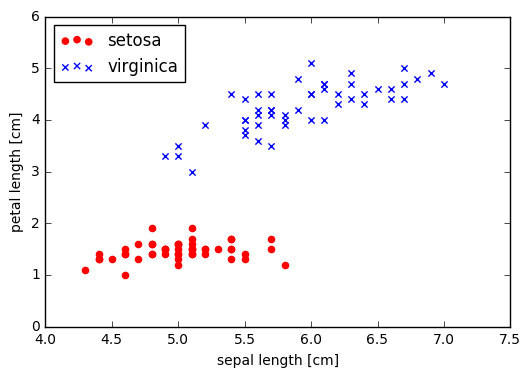

In [3]:
# Iris-setosa 50枚の花と Iris-versicolor 50枚のｈ穴に対応する 先頭の100権のデータを抽出する
# 散布図で可視化する
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # 1-100行目の目的変数(index 4)を取得
y = np.where(y == 'Iris-setosa', -1, 1) # Iris-setosa を -1, Iris-virginica を 1 に変換
X = df.iloc[0:100, [0, 2]].values # 1-100行目の1, 3列目(index 0, 2)を取得

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa') # setosaのプロット(赤o)
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='virginica') # virginicaのプロット(青x)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left') # 凡例

plt.show() # 図の表示


In [4]:
# パーセプトロンのトレーニング
ppn = Perceptron(eta=0.1, n_iter=10) # 学習率 0.1, トレーニング回数10回
ppn.fit(X, y)

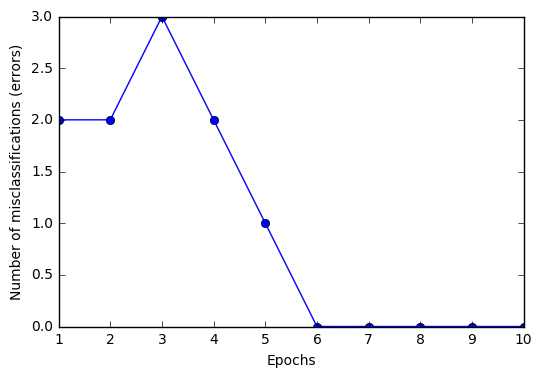

In [5]:
# エポックと誤分類誤差(errors)の関係を折れ線グラフで表示
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications (errors)')

plt.show() # グラフを見ると、6回目ですでに収束している

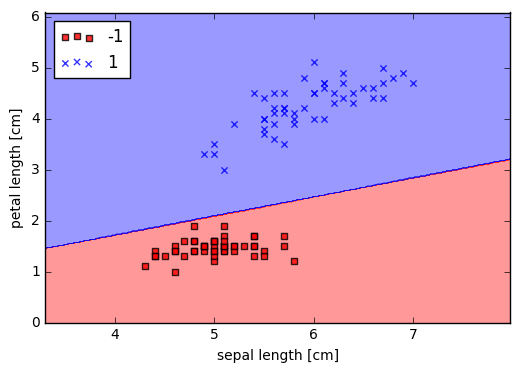

In [6]:
# 決定境界のプロット
import lib
lib.plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left') # 凡例
plt.show() # 図の表示
